In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold

from src.solution_analysis import OOF, SolutionOnFolds

from src.styles import set_styles, PALETTE, TXT_ACC, TXT_RESET

pd.set_option('display.max_columns', None)

set_styles()

In [2]:
def target_status(row):
    num_annot = row.iloc[-6:].sum()
    if (num_annot < 3):
        return 'weak'
    
    row = row.iloc[-6:] / num_annot
    delta = 2. / num_annot
    if (row.iloc[-6:] == 1).any():
        return 'ideal'
    elif (row['other_vote'] >= (0.5 - delta)) & (row['other_vote'] <= (0.5 + delta)) & (row.iloc[-6:-1] == (1. - row['other_vote'])).any():
        return 'proto'
    elif (row['other_vote'] < delta):
        for i in range(2, 7):
            cur = row.iloc[-i]
            if (cur >= (0.5 - delta)) & (cur <= (0.5 + delta)):
                if ((row.iloc[-6:-i] == (1. - cur)).any()) | ((row.iloc[-i+1:-1] == (1. - cur)).any()):
                    return 'edge'
                
    return 'weak'

In [3]:
df = pd.read_csv('data/train.csv').sort_values(['eeg_id', 'eeg_label_offset_seconds'])
dif = df['eeg_label_offset_seconds'] - df['eeg_label_offset_seconds'].shift(1)
df = df.loc[~((dif > 0) & (dif < 50))].reset_index(drop=True) # use only different events

df_bad_ch = pd.read_csv('data/num_bad_channels.csv')
df.insert(df.shape[1] - 7, 'num_bad_channels', df_bad_ch['num_bad_channels'])

status = df.apply(lambda row: target_status(row), axis=1)
df.insert(df.shape[1] - 7, 'target_status', status)

cv = StratifiedGroupKFold(n_splits=5, random_state=42, shuffle=True)
fold_idx = [idx for idx in cv.split(df, df['expert_consensus'], groups=df['patient_id'])]

bad_eeg_ids =  [1457334423, 1593385762, 120145971,  1511903313, 579740230,  588638365, 
                837428467,  2081405553, 3932380488, 1604371226, 2538961182, 2565199369, 
                1339041688, 812448735,  408047047,  4046938588, 2924540968, 1119914885, 116770645]

index_bad = df.loc[df['eeg_id'].isin(bad_eeg_ids)].index.values

for fold in range(5):
    fold_idx[fold] = ([i for i in fold_idx[fold][0] if not i in index_bad], 
                      [i for i in fold_idx[fold][1] if not i in index_bad])

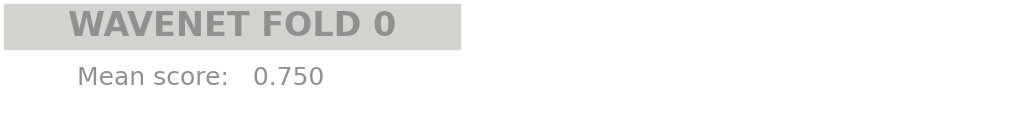

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,17,3.89%,70,0,0.00%
LPD,4,7.41%,43,18,41.86%
GPD,0,0.00%,30,1,3.33%
LRDA,11,19.64%,0,0,0.00%
GRDA,6,3.35%,23,4,17.39%
Other,13,4.18%,173,6,3.47%




 Best predictions 


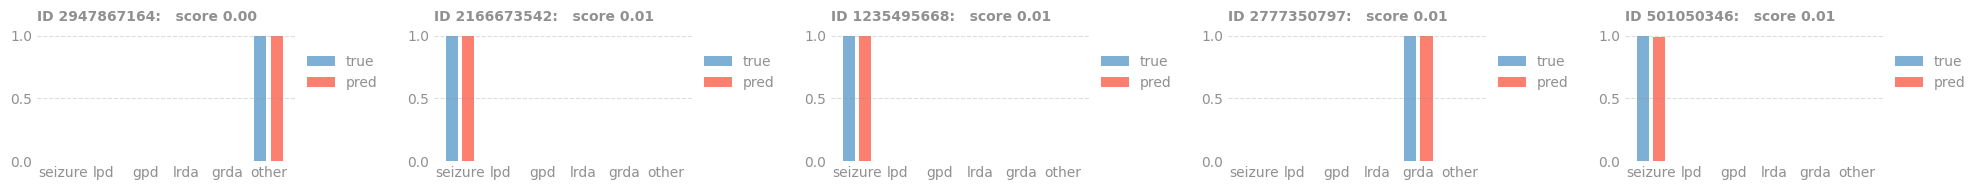


 Worst predictions 


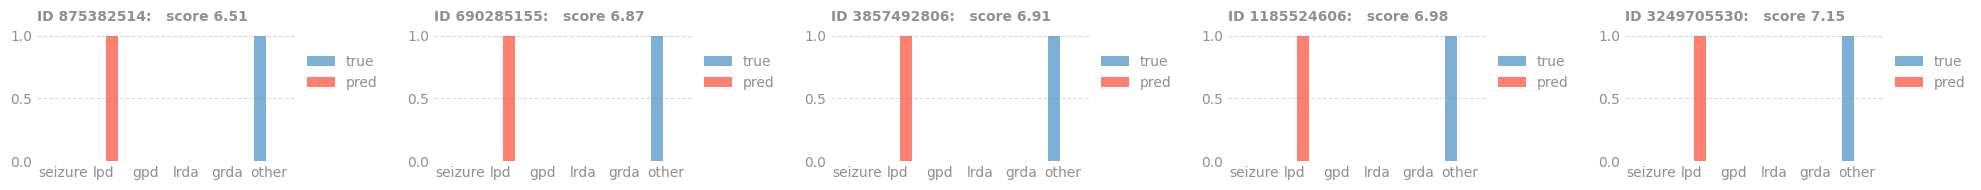


 Confusion matrix for ideal cases 


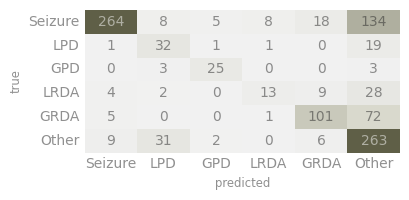

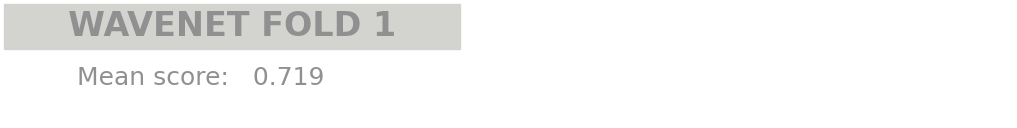

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,26,5.75%,72,6,8.33%
LPD,1,1.49%,57,7,12.28%
GPD,0,0.00%,32,4,12.50%
LRDA,5,9.09%,0,0,0.00%
GRDA,1,0.56%,22,2,9.09%
Other,0,0.00%,123,5,4.07%




 Best predictions 


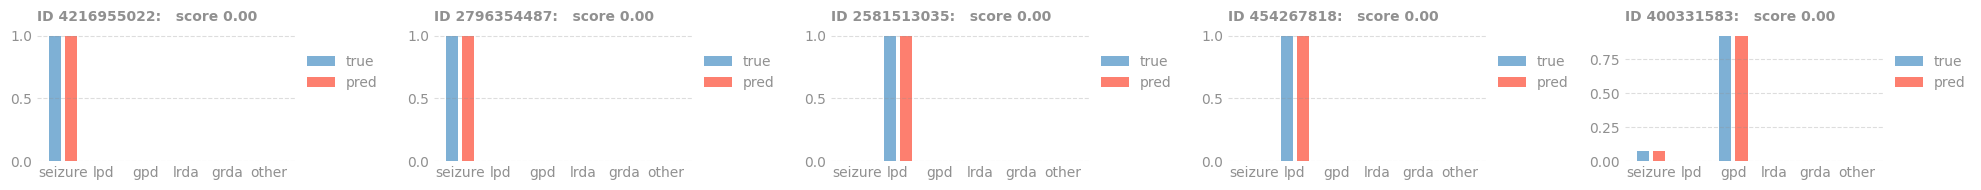


 Worst predictions 


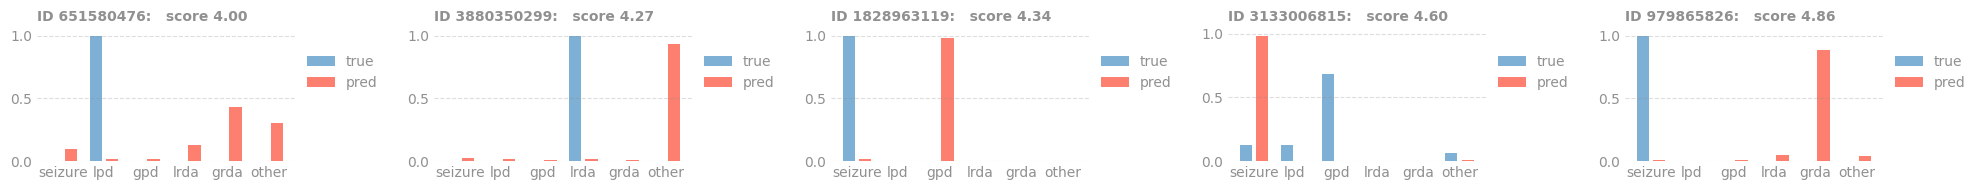


 Confusion matrix for ideal cases 


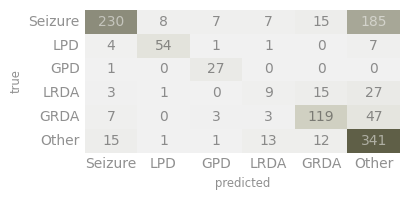

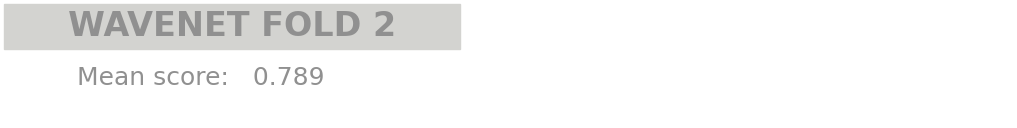

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,39,10.00%,59,0,0.00%
LPD,5,2.48%,171,2,1.17%
GPD,1,2.56%,38,0,0.00%
LRDA,3,8.57%,0,0,0.00%
GRDA,10,6.06%,6,0,0.00%
Other,0,0.00%,105,10,9.52%




 Best predictions 


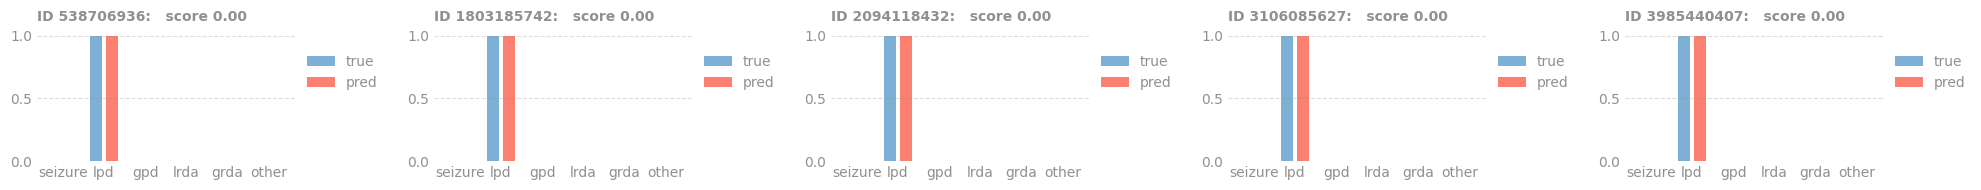


 Worst predictions 


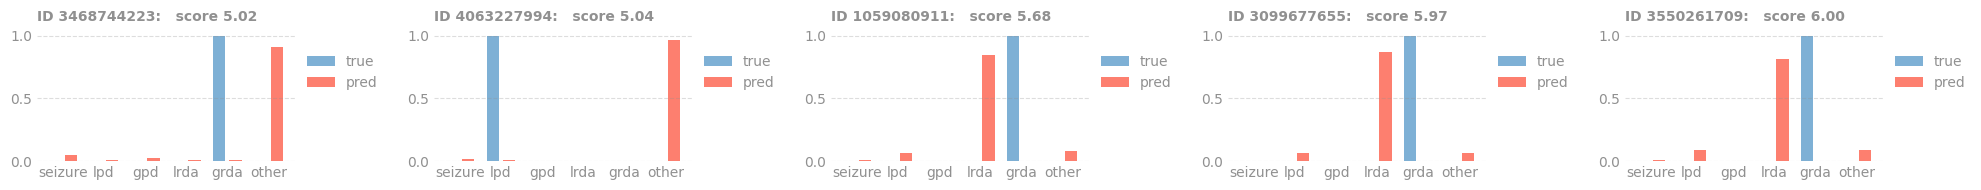


 Confusion matrix for ideal cases 


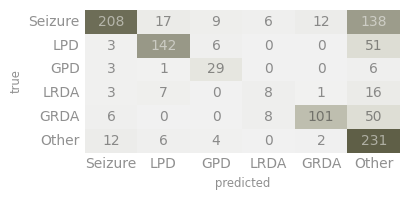

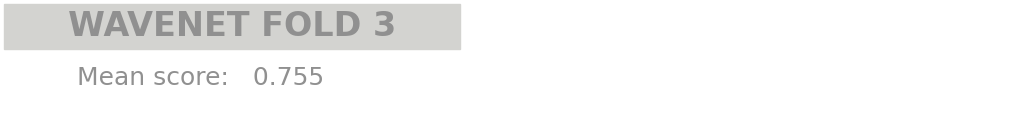

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,28,7.61%,75,6,8.00%
LPD,0,0.00%,16,10,62.50%
GPD,0,0.00%,25,1,4.00%
LRDA,6,11.54%,4,1,25.00%
GRDA,10,5.78%,11,0,0.00%
Other,3,1.09%,87,3,3.45%




 Best predictions 


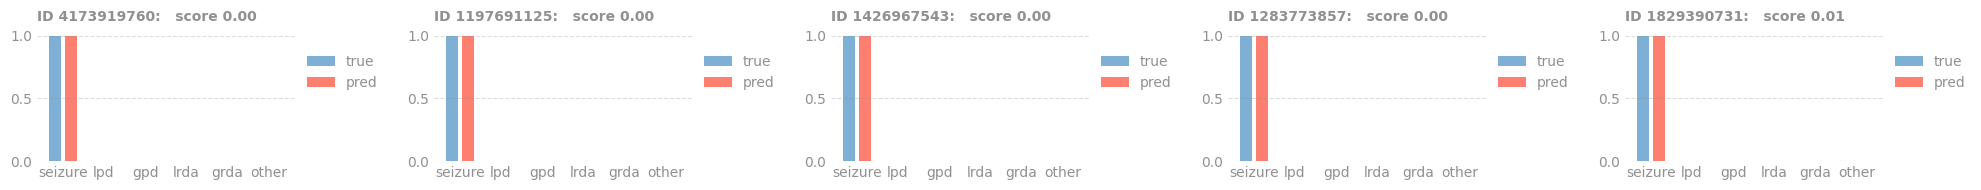


 Worst predictions 


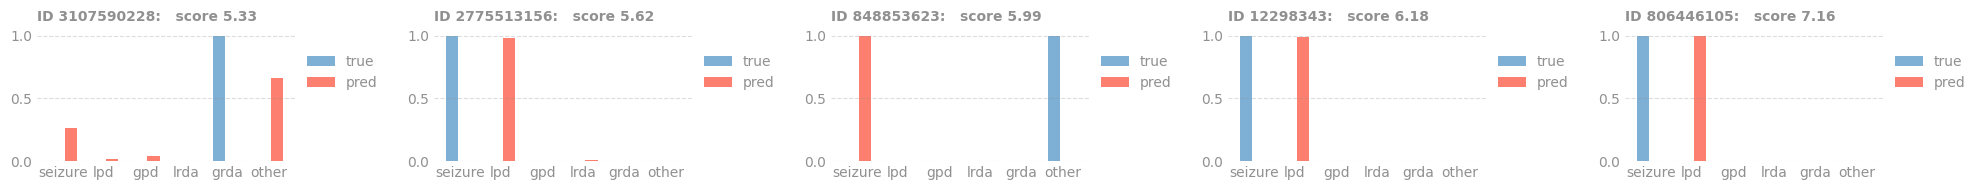


 Confusion matrix for ideal cases 


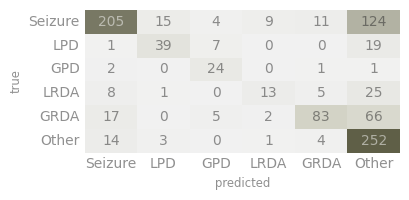

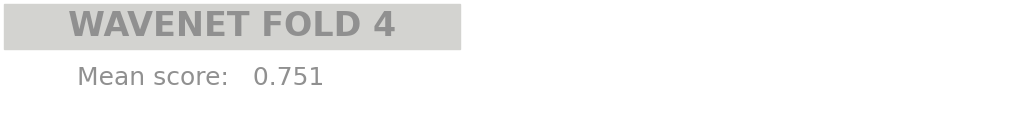

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,12,2.72%,73,4,5.48%
LPD,3,2.65%,27,3,11.11%
GPD,1,2.56%,22,0,0.00%
LRDA,9,19.15%,0,0,0.00%
GRDA,7,4.40%,3,0,0.00%
Other,1,0.36%,106,5,4.72%




 Best predictions 


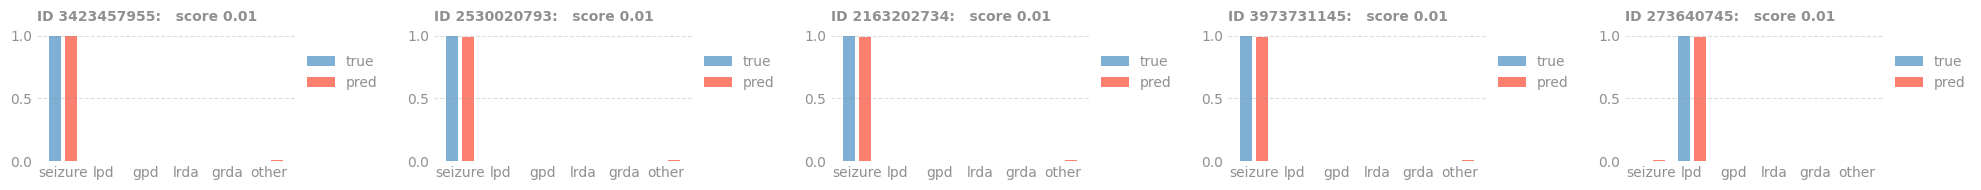


 Worst predictions 


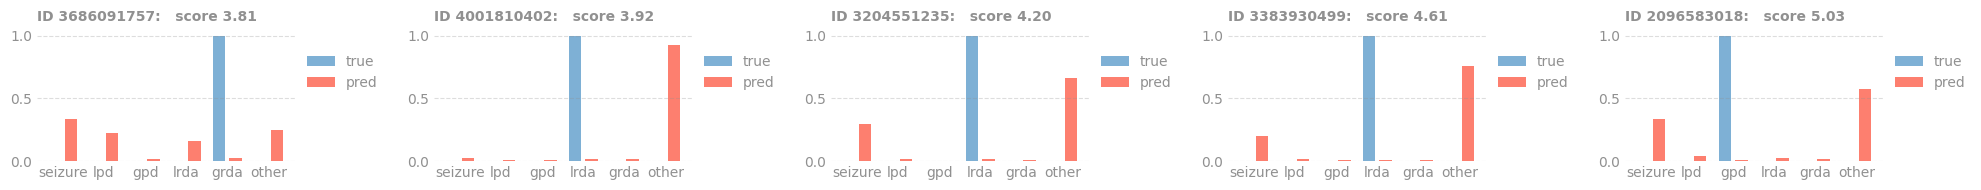


 Confusion matrix for ideal cases 


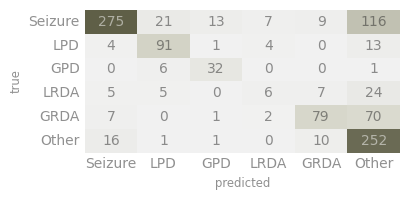

In [4]:
from src.wavenet import SequentialWaveNet
from src.eeg_dif_dataset import EEG_Dif_Dataset

wavenet_params = {
      'model_paths':['trained_models/7y8hwwqy_best_model.pth',    
                    'trained_models/a8hkz55s_best_model.pth',               
                    'trained_models/cd6eeqoy_best_model.pth',     
                    'trained_models/g72yhr4p_best_model.pth',               
                    'trained_models/vhg5bydy_best_model.pth',     
                    ],

      'dataset_class':  EEG_Dif_Dataset,
      'model_class':    SequentialWaveNet,
      'model_params':   {},
}

# solution_wavenet_latest = SolutionOnFolds(**wavenet_params)
# solution_wavenet_latest.predict_OOF(df, fold_idx)
# OOF.analyze_folds(df, fold_idx, solution_wavenet_latest.oofs)

df_oof = pd.read_csv('wavenet_oof.csv')
oofs = [df_oof.loc[df_oof['fold'] == i].reset_index(drop=True) for i in range(5)]
OOF.analyze_folds(df, fold_idx, oofs, 'wavenet')

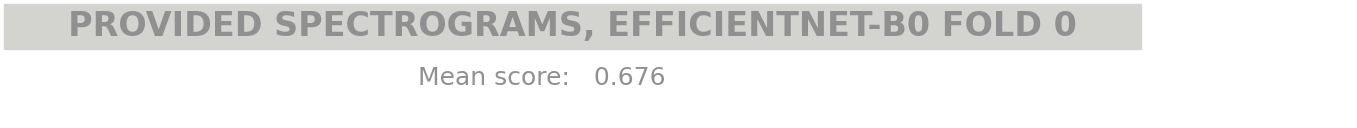

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,24,5.49%,197,11,5.58%
LPD,8,14.81%,35,5,14.29%
GPD,2,6.45%,119,4,3.36%
LRDA,13,23.21%,0,0,0.00%
GRDA,27,15.08%,0,0,0.00%
Other,0,0.00%,423,44,10.40%




 Best predictions 


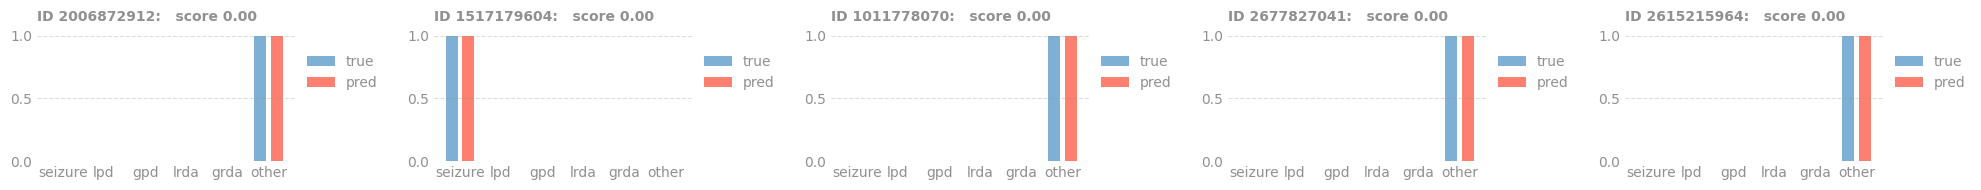


 Worst predictions 


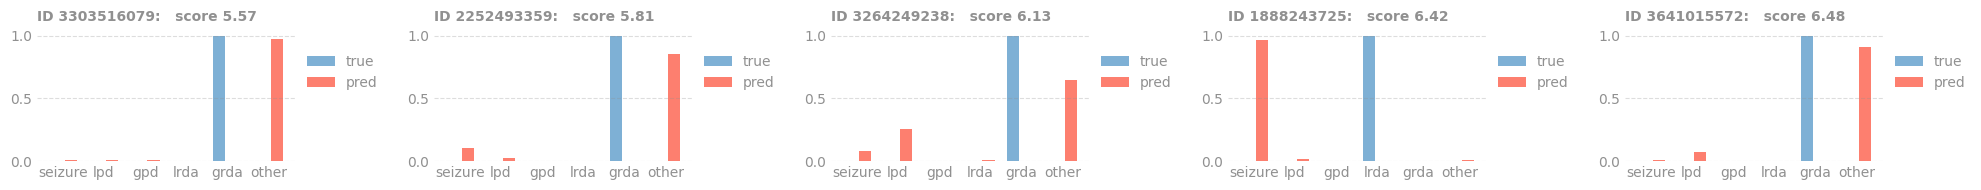


 Confusion matrix for ideal cases 


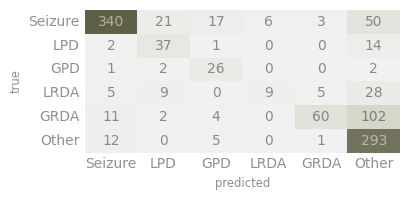

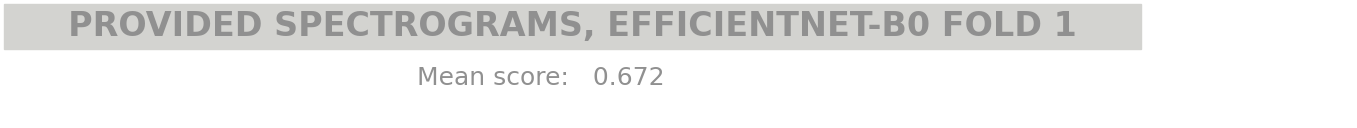

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,36,7.96%,199,17,8.54%
LPD,1,1.49%,78,1,1.28%
GPD,1,3.57%,9,0,0.00%
LRDA,23,41.82%,0,0,0.00%
GRDA,26,14.53%,65,9,13.85%
Other,5,1.31%,718,51,7.10%




 Best predictions 


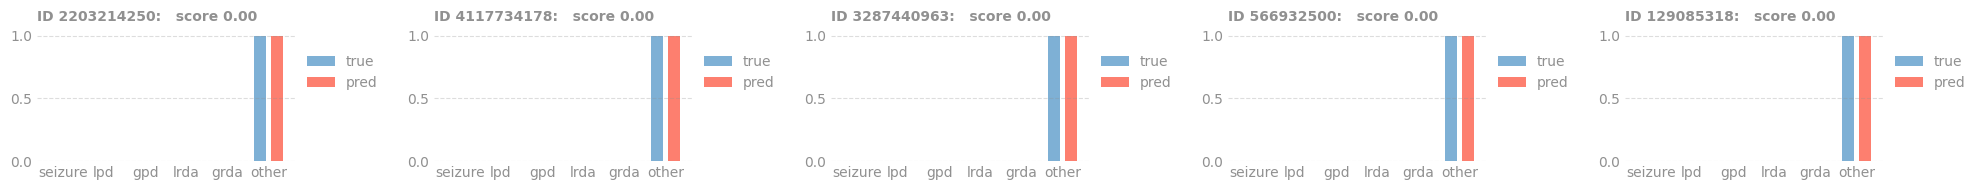


 Worst predictions 


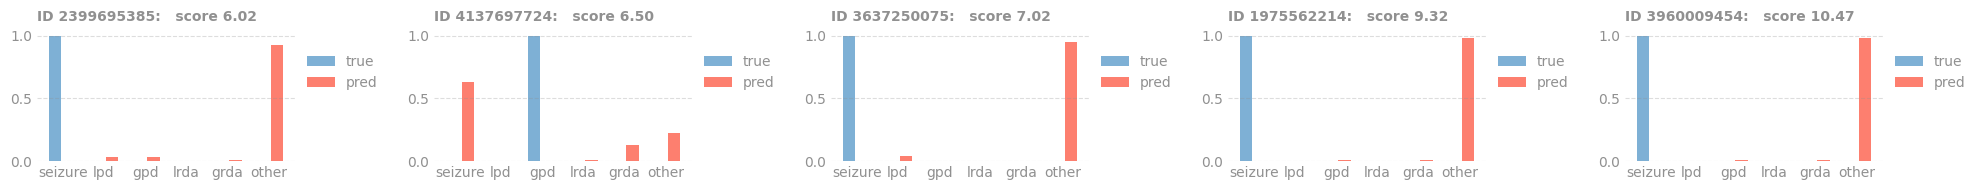


 Confusion matrix for ideal cases 


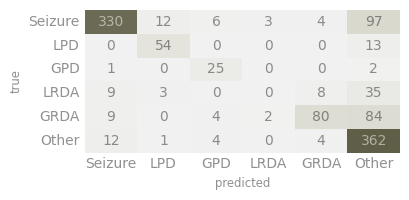

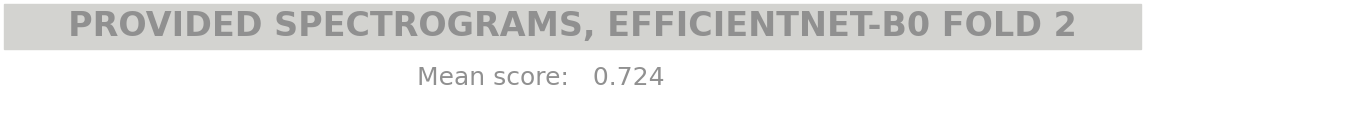

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,38,9.74%,179,13,7.26%
LPD,1,0.50%,219,3,1.37%
GPD,1,2.56%,105,10,9.52%
LRDA,8,22.86%,0,0,0.00%
GRDA,14,8.48%,21,1,4.76%
Other,0,0.00%,406,45,11.08%




 Best predictions 


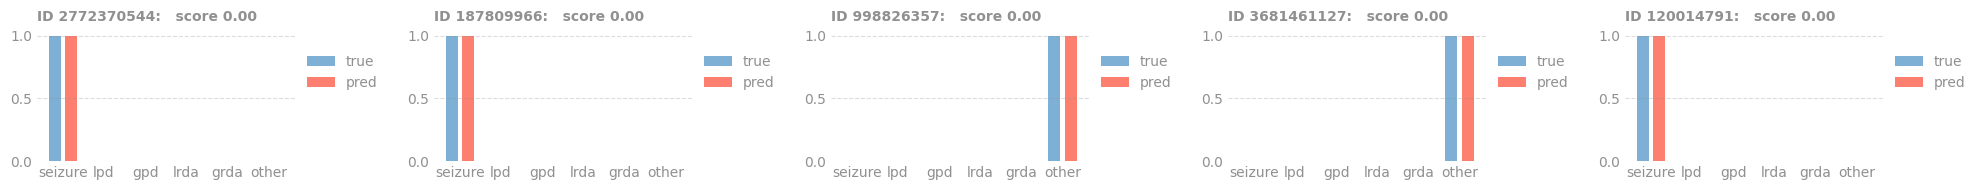


 Worst predictions 


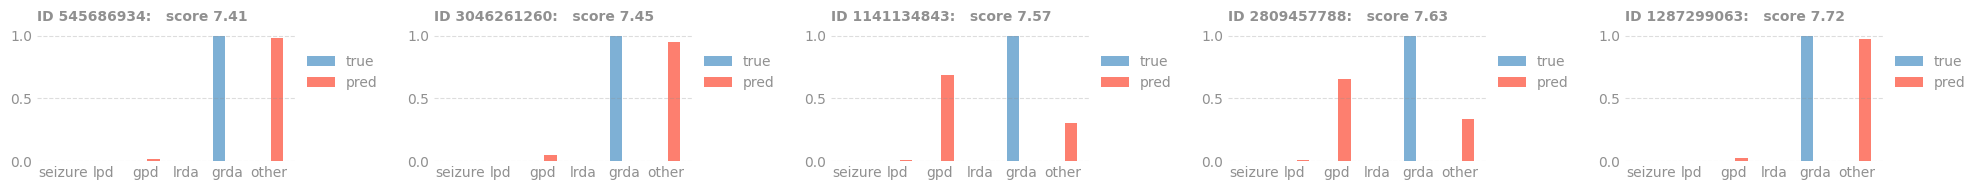


 Confusion matrix for ideal cases 


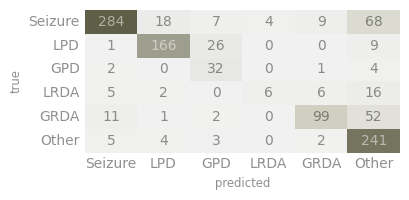

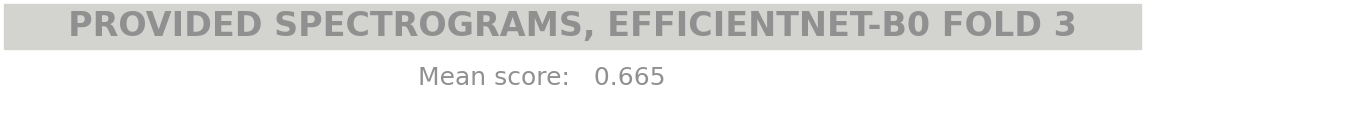

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,45,12.23%,136,12,8.82%
LPD,3,4.55%,14,0,0.00%
GPD,1,3.57%,20,0,0.00%
LRDA,11,21.15%,0,0,0.00%
GRDA,12,6.94%,28,0,0.00%
Other,1,0.36%,401,28,6.98%




 Best predictions 


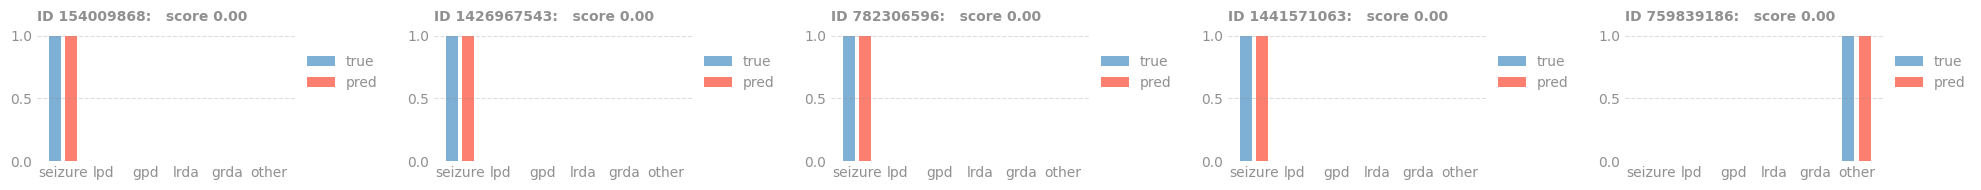


 Worst predictions 


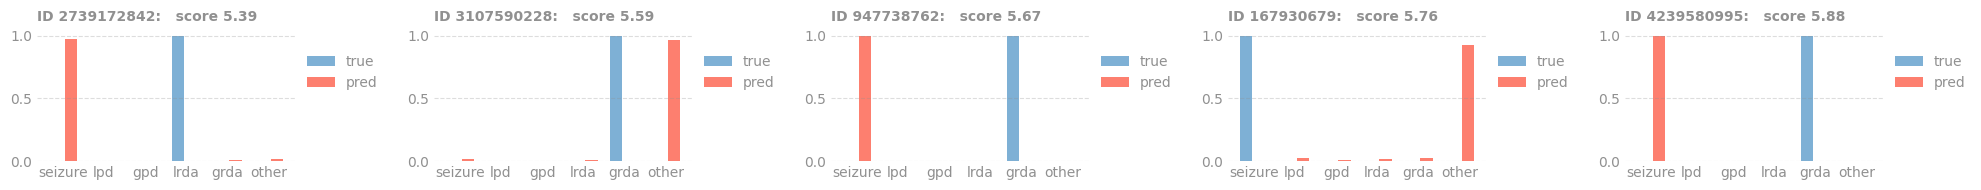


 Confusion matrix for ideal cases 


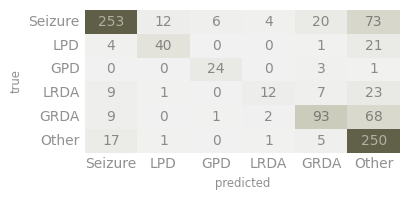

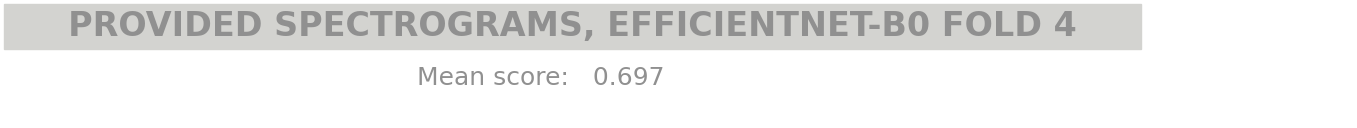

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,19,4.31%,122,9,7.38%
LPD,5,4.42%,29,6,20.69%
GPD,2,5.13%,19,2,10.53%
LRDA,15,31.91%,0,0,0.00%
GRDA,5,3.14%,23,4,17.39%
Other,0,0.00%,342,25,7.31%




 Best predictions 


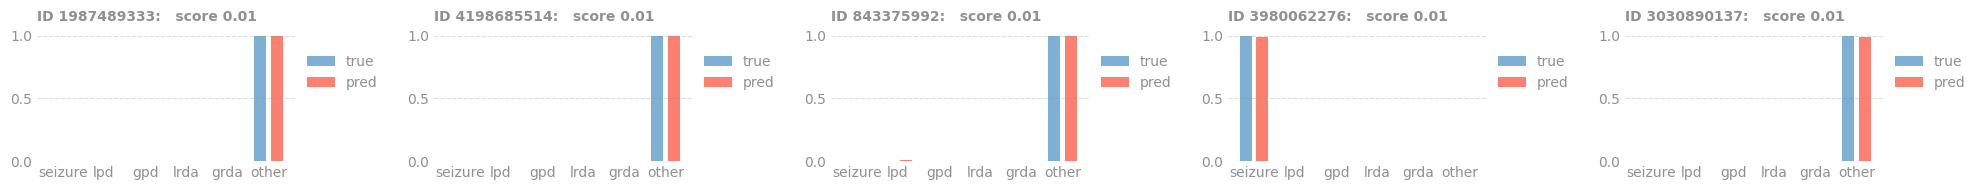


 Worst predictions 


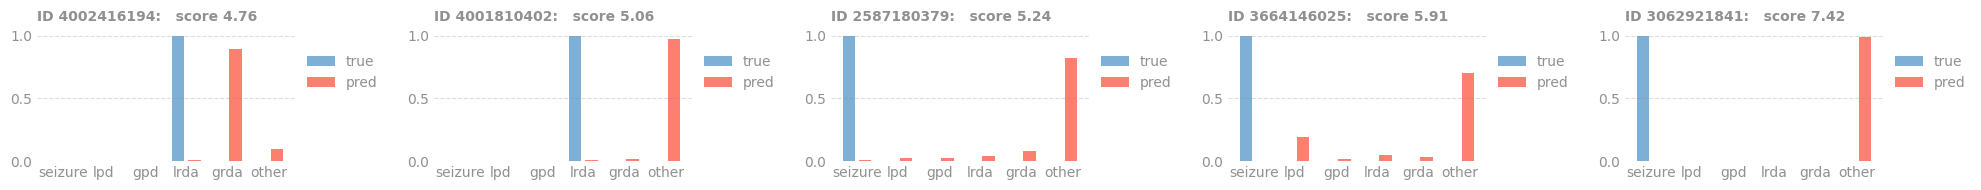


 Confusion matrix for ideal cases 


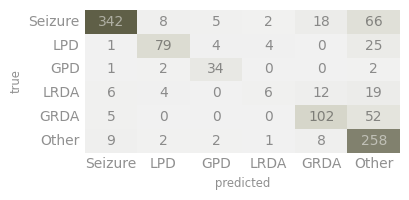

In [5]:
from src.spectrogram_dataset import Spectrogram_4channels_Dataset
from src.efficientnet_wrapper_model import EfficientnetWrapper

kspecs_params = {
      'model_paths':['trained_models/98amw7sy_best_model.pth',   # 0.676   LB 0.60
                     'trained_models/izq8br2w_best_model.pth',   # 0.671   LB 0.62
                     'trained_models/2j50na2y_best_model.pth',   # 0.723   LB 0.55
                     'trained_models/gfumrwxl_best_model.pth',   # 0.665   LB 0.52
                     'trained_models/xblowpcn_best_model.pth',   # 0.697   LB 0.60  
                    ],

      'dataset_class':  Spectrogram_4channels_Dataset,
      'model_class':    EfficientnetWrapper,
      'model_params':   {},
}

# solution_kspecs = SolutionOnFolds(**kspecs_params)
# solution_kspecs.predict_OOF(df, fold_idx, 'kagglespecs_efficientnet_oof.csv')
# OOF.analyze_folds(df, fold_idx, solution_kspecs.oofs)

df_oof = pd.read_csv('kagglespecs_efficientnet_oof.csv')
oofs = [df_oof.loc[df_oof['fold'] == i].reset_index(drop=True) for i in range(5)]
OOF.analyze_folds(df, fold_idx, oofs, 'Provided spectrograms, EfficientNet-B0')

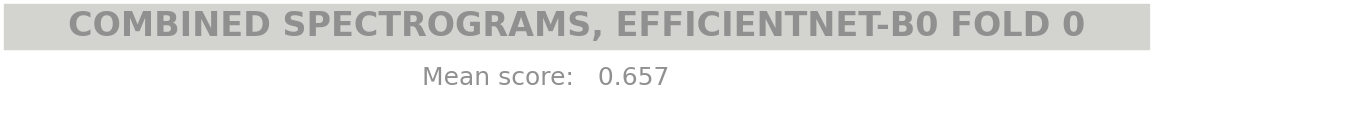

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,26,5.95%,215,16,7.44%
LPD,5,9.26%,7,0,0.00%
GPD,1,3.23%,8,1,12.50%
LRDA,9,16.07%,8,0,0.00%
GRDA,8,4.47%,17,2,11.76%
Other,0,0.00%,421,31,7.36%




 Best predictions 


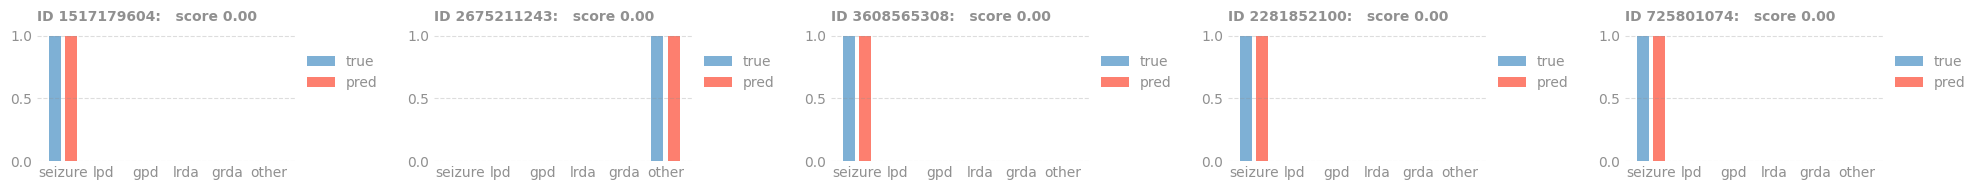


 Worst predictions 


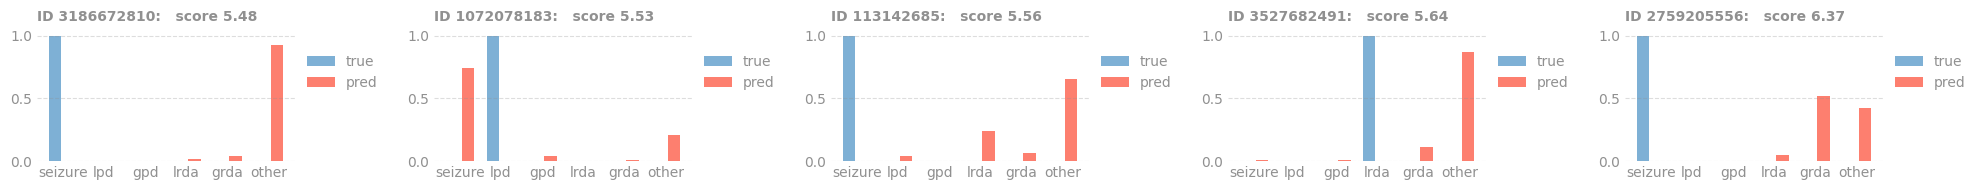


 Confusion matrix for ideal cases 


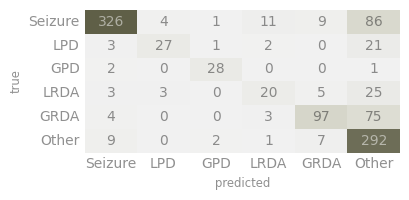

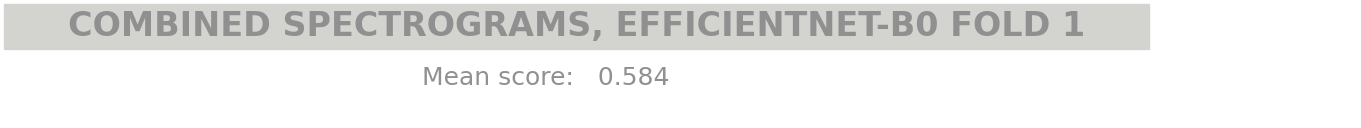

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,34,7.52%,238,22,9.24%
LPD,0,0.00%,47,0,0.00%
GPD,0,0.00%,37,4,10.81%
LRDA,10,18.18%,4,0,0.00%
GRDA,12,6.70%,115,21,18.26%
Other,4,1.04%,594,41,6.90%




 Best predictions 


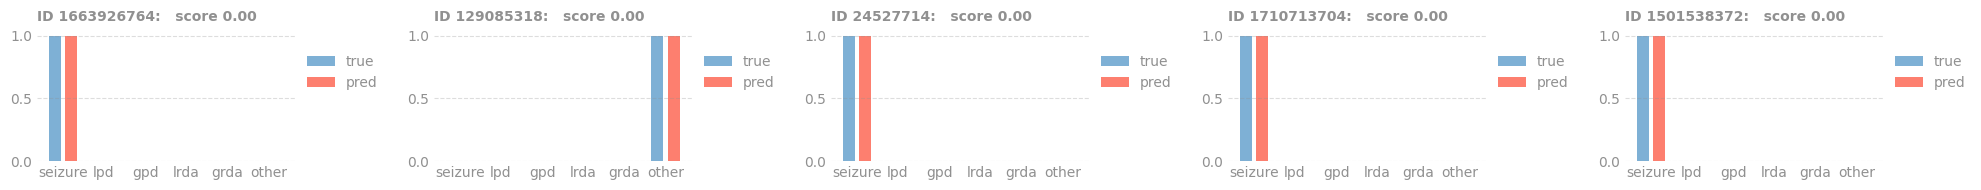


 Worst predictions 


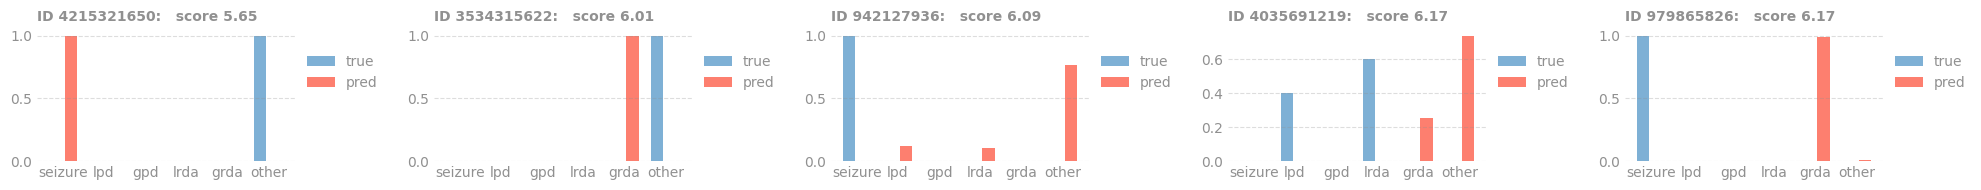


 Confusion matrix for ideal cases 


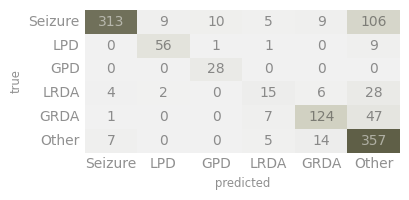

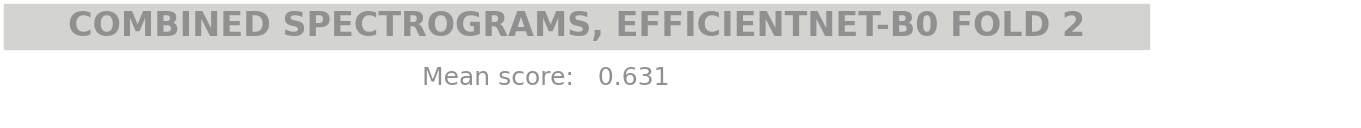

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,36,9.23%,157,7,4.46%
LPD,0,0.00%,345,9,2.61%
GPD,0,0.00%,143,5,3.50%
LRDA,1,2.86%,1,0,0.00%
GRDA,10,6.06%,13,1,7.69%
Other,0,0.00%,258,14,5.43%




 Best predictions 


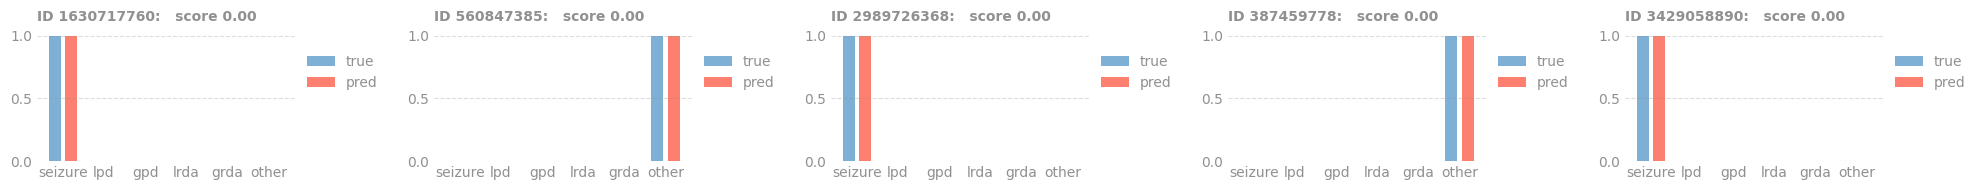


 Worst predictions 


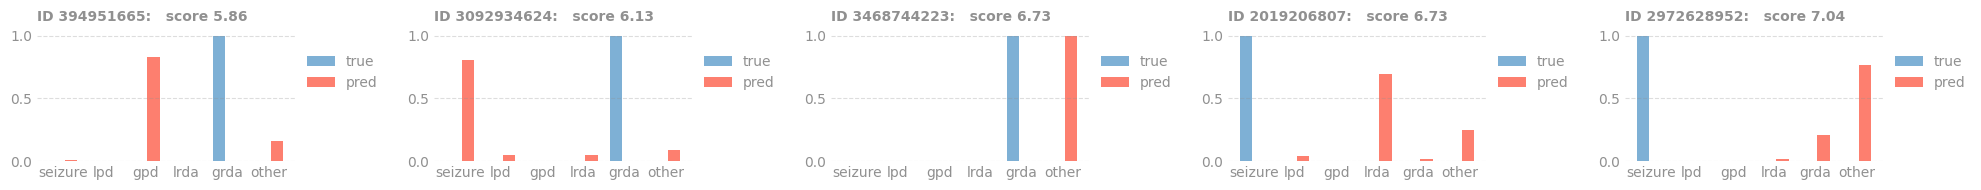


 Confusion matrix for ideal cases 


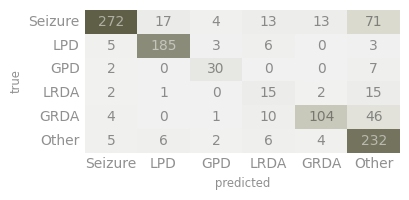

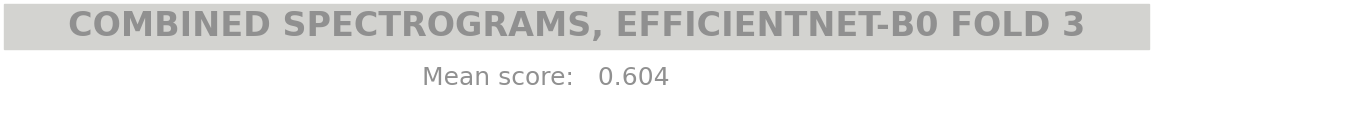

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,35,9.51%,202,24,11.88%
LPD,2,3.03%,26,0,0.00%
GPD,1,3.57%,45,1,2.22%
LRDA,17,32.69%,2,0,0.00%
GRDA,13,7.51%,46,5,10.87%
Other,1,0.36%,435,30,6.90%




 Best predictions 


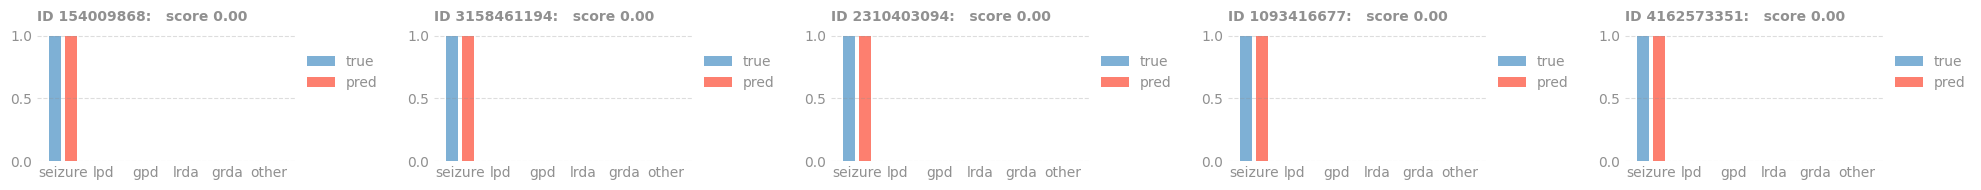


 Worst predictions 


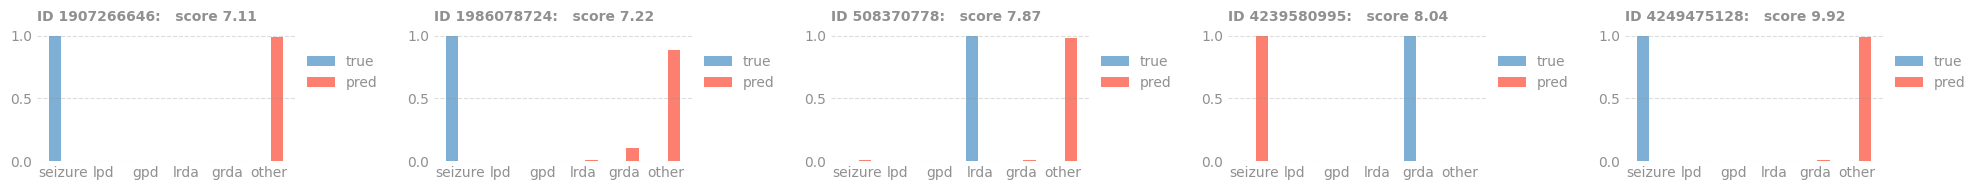


 Confusion matrix for ideal cases 


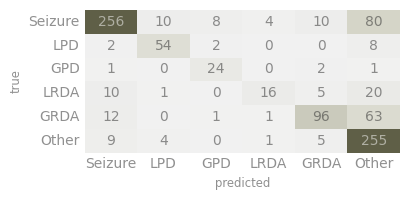

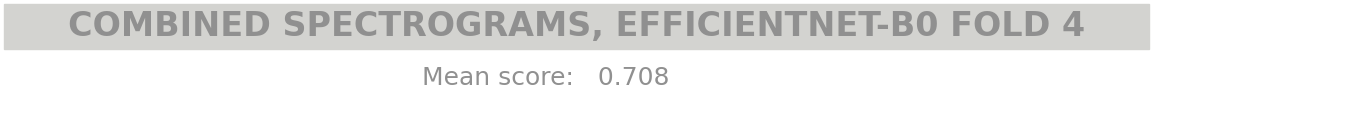

 Score statistics 




 Number of incorrect predictions 


,score >3,%% score >3,predicted vote >90%,wrongly predicted vote >90%,%% wrongly predicted vote >90%
Seizure,22,4.99%,353,57,16.15%
LPD,2,1.77%,150,43,28.67%
GPD,3,7.69%,64,3,4.69%
LRDA,8,17.02%,0,0,0.00%
GRDA,3,1.89%,22,1,4.55%
Other,3,1.07%,288,21,7.29%




 Best predictions 


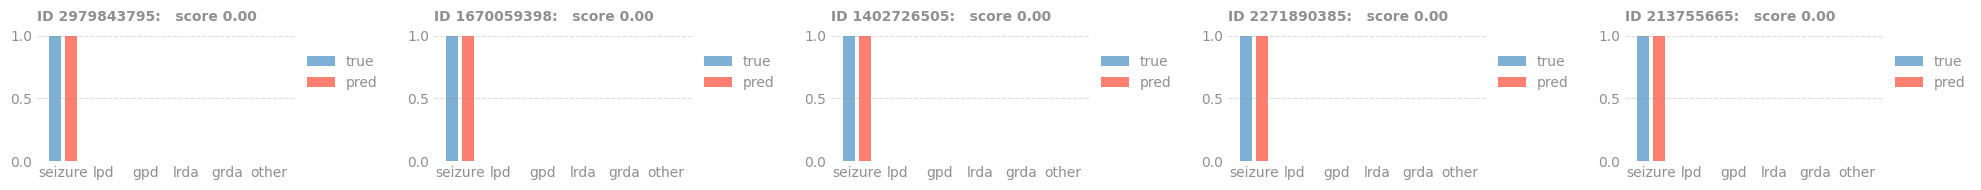


 Worst predictions 


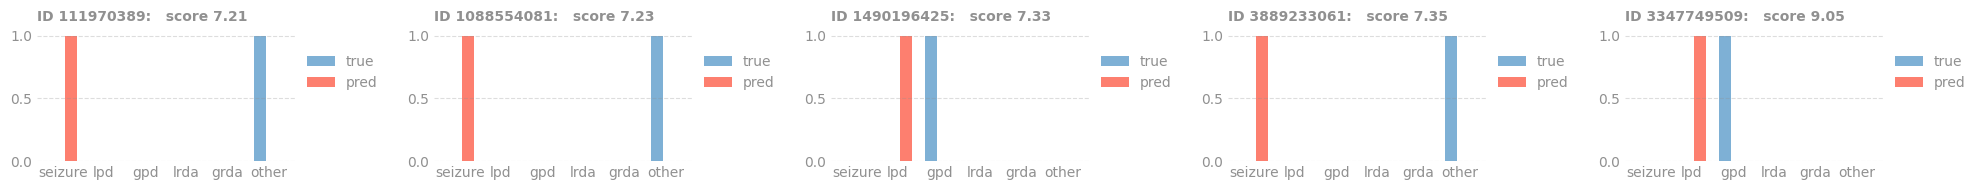


 Confusion matrix for ideal cases 


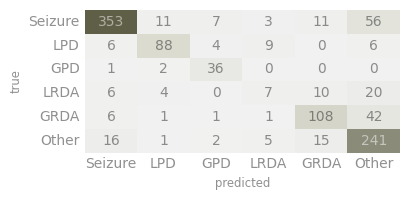

In [6]:
from src.spectrograms_combined_dataset import SpectrogramsCombinedDataset
from src.efficientnet_wrapper_model import EfficientnetWrapper

combspecs_params = {
      'model_paths':['trained_models/cttr20iu_best_model.pth',  # 0.65  LB 0.57
                     'trained_models/nqv9ijg4_best_model.pth',  # 0.58  LB 0.50
                     'trained_models/9akwgq7r_best_model.pth',  # 0.63  LB 0.51
                     'trained_models/s9c8m5fy_best_model.pth',  # 0.60  LB 0.55
                     'trained_models/yh23s2ps_best_model.pth',  # 0.73
                    ],

      'dataset_class':  SpectrogramsCombinedDataset,
      'model_class':    EfficientnetWrapper,
      'model_params':   {},
}

# solution_combspecs = SolutionOnFolds(**combspecs_params)
# solution_combspecs.predict_OOF(df, fold_idx, 'combspecs_efficientnet_oof.csv')
# OOF.analyze_folds(df, fold_idx, solution_combspecs.oofs, 'Combined spectrograms, EfficientNet-B0')

df_oof = pd.read_csv('combspecs_efficientnet_oof.csv')
oofs = [df_oof.loc[df_oof['fold'] == i].reset_index(drop=True) for i in range(5)]
OOF.analyze_folds(df, fold_idx, oofs, 'Combined spectrograms, EfficientNet-B0')